In [1]:
!pip install pandas scikit-learn nltk imbalanced-learn matplotlib seaborn

In [2]:
!pip install nltk --quiet

In [3]:
import sys
!{sys.executable} -m pip install nltk --upgrade

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhaas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhaas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jhaas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhaas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhaas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jhaas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
!pip show nltk

Name: nltk
Version: 3.9.1
Summary: Natural Language Toolkit
Home-page: https://www.nltk.org/
Author: NLTK Team
Author-email: nltk.team@gmail.com
License: Apache License, Version 2.0
Location: C:\Users\jhaas\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: click, joblib, regex, tqdm
Required-by: 


# Load The Dataset

In [7]:
url = 'spam.csv'
df = pd.read_csv(url, encoding='latin-1')
df = df[['v1', 'v2']] 
df.columns = ['label', 'message']  

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Preprocess the Text Data

In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    words = nltk.word_tokenize(text)  # Tokenize text
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

df['cleaned_message'] = df['message'].apply(preprocess)

# Display the cleaned messages
df.head()

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\jhaas/nltk_data'
    - 'C:\\Users\\jhaas\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data'
    - 'C:\\Users\\jhaas\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data'
    - 'C:\\Users\\jhaas\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\jhaas\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


# Visualize Class Distribution

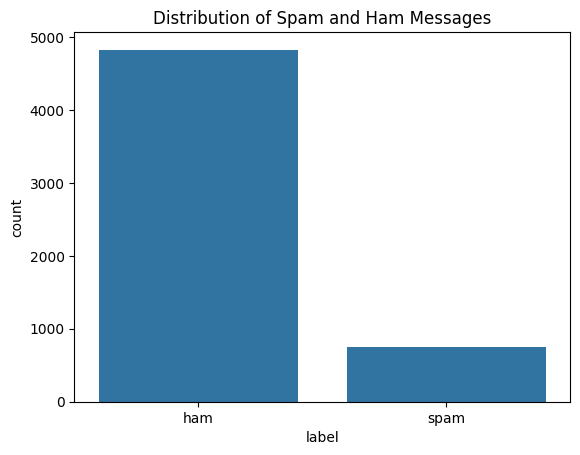

In [42]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.show()

# Feature Extraction with TF-IDF

In [ ]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the cleaned messages into TF-IDF features
X = tfidf.fit_transform(df['cleaned_message']).toarray()
y = df['label'].map({'ham': 0, 'spam': 1}).values

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train and Evaluate Models

In [ ]:
# Initialize and train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Compare Model Performance

In [ ]:
# Create a DataFrame to compare the models
model_comparison = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'SVM'],
    'Accuracy': [
        nb.score(X_test, y_test),
        lr.score(X_test, y_test),
        svm.score(X_test, y_test)
    ]
})

# Display the comparison
print(model_comparison)

# Visualize Confusion Matrices

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(confusion_matrix(y_test, y_pred_nb), 'Naive Bayes')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_lr), 'Logistic Regression')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_svm), 'SVM')